# **Inner Evaluation**

## **Defining outer evaluation method**

### **Train-Test Split**

In [575]:
train_prop = 0.85
train_size = int(np.round(train_prop*n_individuals))
individuals_idx = range(n_individuals)
np.random.seed(123)
train_individuals = np.random.choice(individuals_idx, train_size, replace=False)
test_individuals = np.array([x for x in individuals_idx if x not in train_individuals])

In [576]:
train_individuals

array([0, 1, 3, 7, 4, 2, 5])

In [577]:
len(train_individuals)

7

In [578]:
test_individuals

array([6])

In [579]:
len(test_individuals)

1

Building the training a testing lists `X_HAR` and `Y_HAR` defined above. The same as before but considering training and testing individuals separately.

In [580]:
X_HAR_train = [HAR_database['database_training'][i][0] for i in train_individuals]
Y_HAR_train = [HAR_database['database_training'][i][1][0] for i in train_individuals]

X_HAR_test = [HAR_database['database_training'][i][0] for i in test_individuals]
Y_HAR_test = [HAR_database['database_training'][i][1][0] for i in test_individuals]

The training raw signals matrices list:

In [581]:
X_HAR_train

[array([[ 0.02417325,  0.01990478,  0.03474859, ...,  0.15302195,
          0.16644707,  0.13097667],
        [ 0.59441693,  0.60247182,  0.52582067, ...,  1.9454901 ,
          2.00124793,  1.9890223 ],
        [-0.02273627, -0.01287489, -0.0200163 , ...,  0.00468276,
         -0.00249675, -0.00409452],
        [ 0.11196179,  0.10379559,  0.10319319, ...,  0.11359097,
          0.10181863,  0.10699662],
        [ 0.06049883,  0.05515676,  0.05754055, ...,  0.04945955,
          0.06203927,  0.06837131]]),
 array([[-0.00614456,  0.09416632,  0.02556427, ...,  0.25846636,
          0.26831659,  0.20932986],
        [ 0.15163056,  0.27388097,  0.24967994, ...,  1.01129501,
          1.00222655,  0.94156865],
        [-0.02664025, -0.02277741, -0.00710769, ..., -0.02000222,
         -0.0194218 , -0.01871779],
        [-0.06663789, -0.08298231, -0.10177238, ..., -0.03517126,
         -0.04314523, -0.04061162],
        [ 0.24180082,  0.23684254,  0.24130693, ...,  0.24131465,
          0.23

The testing raw signals matrices list:

In [582]:
X_HAR_test

[array([[ 0.06971024,  0.06352591,  0.07675852, ...,  0.27126796,
          0.16124686,  0.19524657],
        [ 0.39471738,  0.40493709,  0.43956792, ...,  1.27376087,
          1.31028354,  1.25608528],
        [-0.11659078, -0.11212781, -0.10438286, ..., -0.06724237,
         -0.08350385, -0.06953112],
        [ 0.06578621,  0.0653771 ,  0.06778922, ...,  0.09091548,
          0.09260207,  0.09608102],
        [ 0.06120889,  0.05849763,  0.05579525, ...,  0.06037664,
          0.05157136,  0.03467293]])]

The training raw activities vectors list:

In [583]:
Y_HAR_train

[array([3, 3, 3, ..., 3, 3, 3], dtype=uint8),
 array([3, 3, 3, ..., 3, 3, 3], dtype=uint8),
 array([3, 3, 3, ..., 3, 3, 3], dtype=uint8),
 array([3, 3, 3, ..., 3, 3, 3], dtype=uint8),
 array([3, 3, 3, ..., 3, 3, 3], dtype=uint8),
 array([3, 3, 3, ..., 3, 3, 3], dtype=uint8),
 array([3, 3, 3, ..., 3, 3, 3], dtype=uint8)]

The testing raw activities vectors list:

In [584]:
Y_HAR_test

[array([3, 3, 3, ..., 3, 3, 3], dtype=uint8)]

Getting the training and testing predictor matrices and response vectors, using different statistics for feature extraction.

In [585]:
X_train, X_test = {}, {}
statistics_grid = ['mean', 'mean-std', 'mean-median-std', 'mean-Q25-median-Q75-std']
for stat in statistics_grid:
    features_extraction = FeaturesExtractionHAR(blocks_size=sampling_freq, statistics=stat)
    X_train[stat] = features_extraction.transform(X=X_HAR_train)
    X_test[stat] = features_extraction.transform(X=X_HAR_test)

In [586]:
Y_train, Y_train_person, _ = get_y_features_HAR(Y_HAR=Y_HAR_train, blocks_size=sampling_freq)
groups_idx_train = np.concatenate([np.full(len(Y_train_person[i]), i) for i in Y_train_person.keys()]) 
n_groups_train = len(np.unique(groups_idx_train))

Y_test, _, _ = get_y_features_HAR(Y_HAR=Y_HAR_test, blocks_size=sampling_freq)

# Codifying the response as {1:0, 2:1, 3:2, 4:3, 5:4} to avoid problems with certain models like XGBoost
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.fit_transform(Y_test)

The training predictors matrix when using `mean` as statistic in the features extraction method:

In [587]:
X_train['mean']

array([[ 0.03365261,  0.68006947, -0.03290837,  0.10579754,  0.0847926 ],
       [ 0.02045495,  0.73399091,  0.01038365,  0.10670424,  0.01609113],
       [ 0.0369589 ,  0.51999355, -0.01568391,  0.10837755,  0.05546055],
       ...,
       [ 0.13476305,  0.76418404, -0.15004717,  0.01154583, -0.09196487],
       [ 0.14829756,  0.6773758 , -0.13221036,  0.01025543, -0.06299339],
       [ 0.15518139,  0.6740382 , -0.12196696, -0.00395498,  0.06063506]])

In [588]:
X_train['mean'].shape

(7708, 5)

The training predictors matrix when using `mean` and `std` as statistic in the features extraction method:

In [589]:
X_train['mean-std']

array([[ 0.03365261,  0.68006947, -0.03290837, ...,  0.03137443,
         0.00674869,  0.07465121],
       [ 0.02045495,  0.73399091,  0.01038365, ...,  0.02361024,
         0.00949732,  0.05903554],
       [ 0.0369589 ,  0.51999355, -0.01568391, ...,  0.01498785,
         0.0037611 ,  0.02738979],
       ...,
       [ 0.13476305,  0.76418404, -0.15004717, ...,  0.01909474,
         0.00966084,  0.03784605],
       [ 0.14829756,  0.6773758 , -0.13221036, ...,  0.01038249,
         0.008176  ,  0.01989335],
       [ 0.15518139,  0.6740382 , -0.12196696, ...,  0.02631454,
         0.02744556,  0.20666895]])

In [590]:
X_train['mean-std'].shape

(7708, 10)

In [591]:
X_HAR_test

[array([[ 0.06971024,  0.06352591,  0.07675852, ...,  0.27126796,
          0.16124686,  0.19524657],
        [ 0.39471738,  0.40493709,  0.43956792, ...,  1.27376087,
          1.31028354,  1.25608528],
        [-0.11659078, -0.11212781, -0.10438286, ..., -0.06724237,
         -0.08350385, -0.06953112],
        [ 0.06578621,  0.0653771 ,  0.06778922, ...,  0.09091548,
          0.09260207,  0.09608102],
        [ 0.06120889,  0.05849763,  0.05579525, ...,  0.06037664,
          0.05157136,  0.03467293]])]

The training response vector:

In [592]:
Y_train

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [593]:
Y_train.shape

(7708,)

The testing response vector:

In [594]:
Y_test

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [595]:
Y_test.shape

(1128,)

`groups_idx_train` is a vector indicating the to which group (individual) belongs each training observation. It is necessary to apply Group KFold. 

The idea is to associate observations with groups, so, the specific labels doesn't matter.

In [596]:
groups_idx_train

array([0, 0, 0, ..., 6, 6, 6])

In [597]:
groups_idx_train.shape

(7708,)

## **Pipelines definition**

In [598]:
pipelines = {} 

models = {'knn': KNeighborsClassifier(n_jobs=-1), 
          'trees': DecisionTreeClassifier(random_state=123), 
          'extra_trees': ExtraTreesClassifier(random_state=123),
          'RF': RandomForestClassifier(random_state=123), 
          'HGB': HistGradientBoostingClassifier(random_state=123), 
          'MLP': MLPClassifier(random_state=123),
          'LinearSVM': LinearSVC(random_state=123),  
          'XGB': XGBClassifier(random_state=123),
          'Logistic': LogisticRegression(max_iter=250, solver='saga', random_state=123),
          'LGBM': LGBMClassifier(random_state=123, verbose=-1),
          'SVM': SVC(random_state=123)
}

for model_name, model in models.items():

    pipelines[model_name] = Pipeline([
                ('scaler', scaler(apply=False, method='standard')),
                (model_name, model) 
            ])

In [599]:
pipelines['RF'].fit(X=X_train['mean'], y=Y_train)

Pipeline(steps=[('scaler', scaler()),
                ('RF', RandomForestClassifier(random_state=123))])

In [600]:
pipelines['RF'].predict(X=X_test['mean'])

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

## **Defining inner evaluation method**

### **Group KFold Cross Validation**

In [601]:
inner = GroupKFold(n_splits=n_groups_train - 1) 
# n_splits=n_groups_train - 1 implies that the number of groups (individuals) in the validating fold will be 1 or 2.

#### **Understanding how Group KFold it works**

- `GroupKFold`: the *number of groups* in the *testing fold* in each iteration is in `[1, (n_groups - n_splits + 1)]` if `n_splits < n_groups` and `n_groups` if `n_splits == n_groups.`

In [602]:
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10, 8, 10, 10, 5, 6, 7]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d", 'a', "d", "d", "d", 'a', 'c']
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 1, 4, 4, 4, 2, 4]

gkf = GroupKFold(n_splits=3) 
for i, (train, test) in enumerate(gkf.split(X, y, groups=groups)):
    print(f"Iter {i}", f'\n  Idx train fold: {train}', f'\n  Idx test fold: {test}')


Iter 0 
  Idx train fold: [ 3  4  5  6  7  8  9 14] 
  Idx test fold: [ 0  1  2 10 11 12 13 15]
Iter 1 
  Idx train fold: [ 0  1  2  3  4  5 10 11 12 13 14 15] 
  Idx test fold: [6 7 8 9]
Iter 2 
  Idx train fold: [ 0  1  2  6  7  8  9 10 11 12 13 15] 
  Idx test fold: [ 3  4  5 14]


`GroupKFold` **justification**:

In [603]:
cross_val_score(X=X_train['mean'], y=Y_train, estimator=pipelines['RF'], scoring='balanced_accuracy', 
                cv=inner, groups=groups_idx_train)

array([0.91539164, 0.7563062 , 0.71726369, 0.8839834 , 0.91722165,
       0.65759934])

## **Applying the inner evaluation**

### **Grids for HPO**

Defining the preprocessing grid. 

In [604]:
def preprocessing_param_grid(trial):

    # Fixed Grid
    param_grid = {
        'scaler__apply': trial.suggest_categorical('scaler__apply', [True, False])
    }

    # Conditioned Grid
    ################################################################################################################ 
    if param_grid['scaler__apply'] == True:

        param_grid.update({'scaler__method': trial.suggest_categorical('scaler__method', ['standard', 'min-max'])})

    ################################################################################################################

    return param_grid

Defining grids for Machine Learning models.

In [605]:
def param_grid_knn(trial):

    param_grid = preprocessing_param_grid(trial)

    param_grid.update({
        'knn__n_neighbors': trial.suggest_int('knn__n_neighbors', 1, 25),
        'knn__metric': trial.suggest_categorical('knn__metric', ['cosine', 'minkowski', 'cityblock'])
    })

    if param_grid['knn__metric'] == 'minkowski':
        param_grid['knn__p'] = trial.suggest_int('knn__p', 1, 4)

    return param_grid

In [606]:
def param_grid_trees(trial):

    param_grid = preprocessing_param_grid(trial)

    param_grid.update({
        'trees__max_depth': trial.suggest_categorical('trees__max_depth', [None, 2, 5, 7, 10, 20, 30]),
        'trees__min_samples_split': trial.suggest_int('trees__min_samples_split', 2, 25),
        'trees__min_samples_leaf': trial.suggest_int('trees__min_samples_leaf', 2, 25),
        'trees__splitter': trial.suggest_categorical('trees__splitter', ['best', 'random']),
        'trees__criterion': trial.suggest_categorical('trees__criterion', ['log_loss', 'gini', 'entropy']),
        'trees__class_weight': trial.suggest_categorical('trees__class_weight', ['balanced', None])
    })

    return param_grid

In [607]:
def param_grid_extra_trees(trial):

    param_grid = preprocessing_param_grid(trial)

    param_grid.update({
        'extra_trees__n_estimators': trial.suggest_categorical('extra_trees__n_estimators', [30, 50, 75, 100, 120]),
        'extra_trees__max_depth': trial.suggest_categorical('extra_trees__max_depth', [3, 5, 7, 10, 20, 30]),
        'extra_trees__min_samples_split': trial.suggest_int('extra_trees__min_samples_split', 2, 20),
        'extra_trees__min_samples_leaf': trial.suggest_int('extra_trees__min_samples_leaf', 2, 20),
        'extra_trees__criterion': trial.suggest_categorical('extra_trees__criterion', ['gini']),
        'extra_trees__max_features': trial.suggest_categorical('extra_trees__max_features', [0.7, 0.8, 0.9, 1.0]),
        'extra_trees__class_weight': trial.suggest_categorical('extra_trees__class_weight', ['balanced', None])
    })
    
    return param_grid

In [608]:
def param_grid_HGB(trial):

    param_grid = preprocessing_param_grid(trial)

    param_grid.update({
        'HGB__max_depth': trial.suggest_categorical('HGB__max_depth', [5, 10, 20, 30, 40, 50]),
        'HGB__l2_regularization': trial.suggest_float('HGB__l2_regularization', 0.01, 0.7, log=True),
        'HGB__max_iter': trial.suggest_categorical('HGB__max_iter', [50, 70, 100, 130, 150])
    })

    return param_grid

In [609]:
def param_grid_XGB(trial):

    param_grid = preprocessing_param_grid(trial)

    param_grid.update({
        'XGB__max_depth': trial.suggest_categorical('XGB__max_depth', [10, 20, 30, 40, 50, 70, 100]),
        'XGB__reg_lambda': trial.suggest_float('XGB__reg_lambda', 0, 1, step=0.05, log=False),
        'XGB__n_estimators': trial.suggest_categorical('XGB__n_estimators', [50, 70, 100, 130, 150]),
        'XGB__eta': trial.suggest_float('XGB__eta', 0, 0.3, step=0.02, log=False),
        'XGB__alpha': trial.suggest_float('XGB__alpha', 0.2, 1, step=0.01, log=False)
    })

    return param_grid

In [610]:
def param_grid_RF(trial):

    param_grid = preprocessing_param_grid(trial)

    param_grid.update({
        'RF__n_estimators': trial.suggest_categorical('RF__n_estimators', [30, 50, 75, 100, 120, 150, 200, 250]),
        'RF__max_depth': trial.suggest_categorical('RF__max_depth', [3, 4, 5, 7, 10, 20, 30]),
        'RF__min_samples_split': trial.suggest_int('RF__min_samples_split', 2, 20),
        'RF__min_samples_leaf': trial.suggest_int('RF__min_samples_leaf', 2, 20),
        'RF__criterion': trial.suggest_categorical('RF__criterion', ['gini', 'entropy']),
        'RF__class_weight': trial.suggest_categorical('RF__class_weight', ['balanced', None])
    })
    
    return param_grid

In [611]:
def param_grid_LinearSVM(trial):

    param_grid = preprocessing_param_grid(trial)

    param_grid.update({
        'LinearSVM__C': trial.suggest_float('SVM__C', 0.001, 2, log=True),
        'LinearSVM__class_weight': trial.suggest_categorical('LinearSVM__class_weight', ['balanced', None])
    })

    return param_grid

In [612]:
def param_grid_MLP(trial):

    param_grid = preprocessing_param_grid(trial)

    param_grid.update({
        'MLP__learning_rate_init': trial.suggest_float('MLP__learning_rate_init', 0.0001, 0.2, log=True),
        'MLP__alpha': trial.suggest_float('MLP__alpha', 0.01, 1, log=True)
    })

    return param_grid

In [613]:
def param_grid_Logistic(trial):

    param_grid = preprocessing_param_grid(trial)

    param_grid.update({
        'Logistic__penalty':  trial.suggest_categorical('Logistic__penalty', ['l1', 'l2', 'elasticnet', None]),
        'Logistic__C': trial.suggest_float('Logistic__C', 0.001, 2, log=True),
        'Logistic__class_weight': trial.suggest_categorical('Logistic__class_weight', ['balanced', None])
    })

    if param_grid['Logistic__penalty'] == 'elasticnet':
        param_grid.update({'Logistic__l1_ratio': trial.suggest_float('Logistic__l1_ratio', 0.1, 1, log=True)})

    return param_grid

In [614]:
def param_grid_SVM(trial):

    param_grid = preprocessing_param_grid(trial)

    param_grid.update({
        'SVM__C': trial.suggest_float('SVM__C', 0.1, 5, log=True),
        'SVM__kernel': trial.suggest_categorical('SVM__kernel', ['poly', 'rbf', 'sigmoid']),
        'SVM__class_weight': trial.suggest_categorical('SVM__class_weight', ['balanced', None])
    })

    if param_grid['SVM__kernel'] == 'poly':

        param_grid.update({
            'SVM__degree': trial.suggest_int('SVM__degree', 1, 5)
        })

    return param_grid

In [615]:
def param_grid_LGBM(trial):

    param_grid = preprocessing_param_grid(trial)

    param_grid.update({
        'LGBM__max_depth': trial.suggest_int('LGBM__max_depth', 2, 200),
        'LGBM__num_leaves': trial.suggest_int('LGBM__num_leaves', 2, 200),
        'LGBM__n_estimators': trial.suggest_categorical('LGBM__n_estimators', [30, 50, 70, 100, 120, 150, 180, 200, 250, 300]),
        'LGBM__learning_rate': trial.suggest_float('LGBM__learning_rate', 0.0001, 0.1, log=True),
        'LGBM__lambda_l1': trial.suggest_float('LGBM__lambda_l1', 0.001, 1, log=True),
        'LGBM__lambda_l2': trial.suggest_float('LGBM__lambda_l2', 0.001, 1, log=True),
        'LGBM__min_split_gain': trial.suggest_float('LGBM__min_split_gain', 0.001, 0.01, log=True),
        'LGBM__min_child_weight': trial.suggest_int('LGBM__min_child_weight', 5, 60),
        'LGBM__feature_fraction': trial.suggest_float('LGBM__feature_fraction', 0.1, 0.9, step=0.05)
    })

    return param_grid

### **HPO**

In [711]:
inner_score, best_params, inner_results = {model_name: {} for model_name in models.keys()}, {model_name: {} for model_name in models.keys()}, {model_name: {} for model_name in models.keys()}

In [ ]:
for model_name in models.keys():

    print(f'=====================================\n Model: {model_name} \n=====================================')

    param_grid = globals()[f'param_grid_{model_name}']

    simple_eval = SimpleEvaluation(estimator=pipelines[model_name],  
                                cv=inner, 
                                groups=groups_idx_train,
                                param_grid=param_grid,
                                search_method='optuna',
                                scoring='balanced_accuracy', 
                                direction='maximize', 
                                n_trials=25, 
                                random_state=123)

    for stat in statistics_grid:
        print(f'---------------------------------------------------\n Statistics for feature extraction method: {stat} \n---------------------------------------------------')

        simple_eval.fit(X=X_train[stat], y=Y_train)

        inner_score[model_name][stat] = simple_eval.inner_score
        best_params[model_name][stat] = simple_eval.inner_best_params
        inner_results[model_name][stat] = simple_eval.inner_results

- **Processing the inner results:**

In [ ]:
for model_name in models.keys():

    best_stats = list(inner_score[model_name].keys())[np.argmax(np.array(list(inner_score[model_name].values())))]
    best_params[model_name][best_stats].update({'features_extraction__statistics': best_stats})
    inner_score[model_name] = inner_score[model_name][best_stats]
    best_params[model_name] = best_params[model_name][best_stats]

- **Saving the inner results:**

In [ ]:
'''
with open(r'C:\Users\fscielzo\Documents\DataScience-GitHub\Human-Activity-Recognition\results\inner_score.pkl', 'wb') as file:
    pickle.dump(inner_score, file)
with open(r'C:\Users\fscielzo\Documents\DataScience-GitHub\Human-Activity-Recognition\results\best_params.pkl', 'wb') as file:
    pickle.dump(best_params, file)
with open(r'C:\Users\fscielzo\Documents\DataScience-GitHub\Human-Activity-Recognition\results\inner_results.pkl', 'wb') as file:
    pickle.dump(inner_results, file)
'''    

### **Selecting the best pipeline**

- **Opening the inner results**

In [616]:
with open(r'C:\Users\fscielzo\Documents\DataScience-GitHub\Human-Activity-Recognition\results\inner_score.pkl', 'rb') as file:
    inner_score = pickle.load(file)
with open(r'C:\Users\fscielzo\Documents\DataScience-GitHub\Human-Activity-Recognition\results\best_params.pkl', 'rb') as file:
    best_params = pickle.load(file)
with open(r'C:\Users\fscielzo\Documents\DataScience-GitHub\Human-Activity-Recognition\results\inner_results.pkl', 'rb') as file:
    inner_results = pickle.load(file)

- Processing the results

In [617]:
inner_score_values = np.array(list(inner_score.values()))
pipeline_names = list(inner_score.keys())
best_pipeline_name = pipeline_names[np.argmax(inner_score_values)]
score_best_pipeline = np.max(inner_score_values)

combined_models_score = list(zip(pipeline_names, inner_score_values))
sorted_combined_models_score= sorted(combined_models_score, key=lambda x: x[1], reverse=True)  # Sort from greater to lower
sorted_models, sorted_scores = zip(*sorted_combined_models_score)

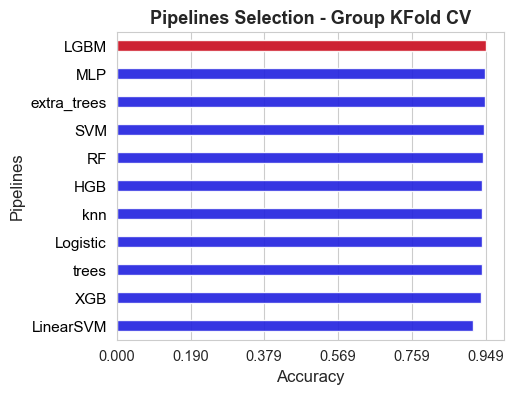

The best pipeline among all the 11 alternatives compared in this final stage, according to the inner evaluation, is: LGBM
Accuracy of the best pipeline:  0.949

The best pipeline hyper-parameters are:  {'scaler__apply': False, 'LGBM__max_depth': 23, 'LGBM__num_leaves': 71, 'LGBM__n_estimators': 120, 'LGBM__learning_rate': 0.005320673587684961, 'LGBM__lambda_l1': 0.008840401399518267, 'LGBM__lambda_l2': 0.002389872230017185, 'LGBM__min_split_gain': 0.0015901799134300236, 'LGBM__min_child_weight': 22, 'LGBM__feature_fraction': 0.75, 'features_extraction__statistics': 'mean-median-std'}


In [618]:
fig, axes = plt.subplots(figsize=(5,4))
ax = sns.barplot(y=list(sorted_models), x=list(sorted_scores), color='blue', width=0.4, alpha=0.9)
ax = sns.barplot(y=[best_pipeline_name], x=[score_best_pipeline], color='red', width=0.4, alpha=0.9)
ax.set_ylabel('Pipelines', size=12)
ax.set_xlabel('Accuracy', size=12)
ax.set_xticks(np.round(np.linspace(0, np.max(inner_score_values), 6),3)) 
ax.tick_params(axis='y', labelsize=11) 
ax.tick_params(axis='x', labelsize=10.5)    
plt.title('Pipelines Selection - Group KFold CV', size=13, weight='bold')
for label in ax.get_yticklabels():
    #label.set_weight('bold')
    label.set_color('black') 
plt.show()

print(f'The best pipeline among all the {len(sorted_scores)} alternatives compared in this final stage, according to the inner evaluation, is: {best_pipeline}')
print('Accuracy of the best pipeline: ', np.round(score_best_pipeline, 3))
print('\nThe best pipeline hyper-parameters are: ', best_params[best_pipeline_name])

#### **Defining the best pipeline**

Defining a general pipeline:

In [619]:
final_pipeline = Pipeline([
                    ('features_extraction', FeaturesExtractionHAR(blocks_size=sampling_freq, statistics='mean')),
                    ('scaler', scaler(apply=False, method='standard')),
                    (best_pipeline_name, models[best_pipeline_name]) 
                ])

Setting the best parameter to the defined pipeline:

In [620]:
final_pipeline.set_params(**best_params[best_pipeline_name])

Pipeline(steps=[('features_extraction',
                 FeaturesExtractionHAR(blocks_size=16,
                                       statistics='mean-median-std')),
                ('scaler', scaler()),
                ('LGBM',
                 LGBMClassifier(feature_fraction=0.75,
                                lambda_l1=0.008840401399518267,
                                lambda_l2=0.002389872230017185,
                                learning_rate=0.005320673587684961,
                                max_depth=23, min_child_weight=22,
                                min_split_gain=0.0015901799134300236,
                                n_estimators=120, num_leaves=71,
                                random_state=123, verbose=-1))])